# **📊 NVDA vs. WOK**
Stocks move in different ways—some surge ahead with momentum, while others lag behind. NVDA and WOK stand on opposite ends of that spectrum, making them an interesting comparison in market behavior.  

## 🔎 **What Are These Stocks?**  
NVDA is a technology company that creates and sells graphic processing units. They have had a history as being the leader in AI hardware and software products that are utilized by many industries. WOK is a medical device company that develops and sells medical devices. Their devices range from face masks to breathing circuits that are purchased and utilized by hospitals, pharmacies, and other medical institutions. While we cannot compare the two companies by what they create and sell, we can analyze the technical indicators of their stock prices to get an understanding of the risk and volatility of the stock for investment purposes. 

## ⚖️ **A Gainer vs. A Loser?**  

Analyzing their performance side by side reveals key insights into **risk, reward, and market behavior**. Which stock is riding the trend, and which one is falling behind?

This analysis will cover the fourth quarter of 2024 and the first month of 2025

---

# **Data Preparation and Cleaning for Stock Prices**

In [1]:
# Import necessary libraries
import pandas as pd
import json
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np

# Import the mongo log in
from cindy_private import cindy

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(cindy)

In [3]:
# assign the project3_group4 database to a variable name
db = mongo.project3_group4

In [4]:
# Create a list out of the stock data that was imported into the mongoDB data base and collection
# Assign a variable to the collection
mongo_stock_data = db.stock_data

In [5]:
# Query the collection for documents containing data for NVDA and WOK symbols 
# Create a list out of the stock data 
query = {
    '$or': [
        {'symbol': 'NVDA'},
        {'symbol': 'WOK'}
    ],
    'date': {'$gte': '2024-10-01', '$lte': '2025-01-28'} 
    }
nvda_wok = list(mongo_stock_data.find(query))
nvda_wok

[{'_id': ObjectId('679d046a5b5b3db608f0c637'),
  '1. open': '121.8100',
  '2. high': '129.0000',
  '3. low': '116.2500',
  '4. close': '128.9900',
  '5. volume': '579666350',
  'date': '2025-01-28',
  'symbol': 'NVDA'},
 {'_id': ObjectId('679d046a5b5b3db608f0c638'),
  '1. open': '124.8000',
  '2. high': '128.4000',
  '3. low': '116.7000',
  '4. close': '118.4200',
  '5. volume': '818830895',
  'date': '2025-01-27',
  'symbol': 'NVDA'},
 {'_id': ObjectId('679d046a5b5b3db608f0c639'),
  '1. open': '148.3700',
  '2. high': '148.9700',
  '3. low': '141.8800',
  '4. close': '142.6200',
  '5. volume': '234657635',
  'date': '2025-01-24',
  'symbol': 'NVDA'},
 {'_id': ObjectId('679d046a5b5b3db608f0c63a'),
  '1. open': '145.0500',
  '2. high': '147.2300',
  '3. low': '143.7200',
  '4. close': '147.2200',
  '5. volume': '155915549',
  'date': '2025-01-23',
  'symbol': 'NVDA'},
 {'_id': ObjectId('679d046a5b5b3db608f0c63b'),
  '1. open': '144.6600',
  '2. high': '147.7900',
  '3. low': '143.6700',

In [6]:
# Create a data frame 
df = pd.DataFrame(nvda_wok)

In [7]:
# Edit the data frame column names
df.rename(columns={'1. open': 'open', '2. high': 'high','3. low':'low','4. close':'close','5. volume':'volume'},
                             inplace=True)
df.head()

,_id,open,high,low,close,volume,date,symbol
0,679d046a5b5b3db608f0c637,121.8100,129.0000,116.2500,128.9900,579666350,2025-01-28,NVDA
1,679d046a5b5b3db608f0c638,124.8000,128.4000,116.7000,118.4200,818830895,2025-01-27,NVDA
2,679d046a5b5b3db608f0c639,148.3700,148.9700,141.8800,142.6200,234657635,2025-01-24,NVDA
3,679d046a5b5b3db608f0c63a,145.0500,147.2300,143.7200,147.2200,155915549,2025-01-23,NVDA
4,679d046a5b5b3db608f0c63b,144.6600,147.7900,143.6700,147.0700,237651395,2025-01-22,NVDA


In [8]:
# Drop uncessary columns
final_df = df.drop(columns=['_id'])
final_df.head()

,open,high,low,close,volume,date,symbol
0,121.8100,129.0000,116.2500,128.9900,579666350,2025-01-28,NVDA
1,124.8000,128.4000,116.7000,118.4200,818830895,2025-01-27,NVDA
2,148.3700,148.9700,141.8800,142.6200,234657635,2025-01-24,NVDA
3,145.0500,147.2300,143.7200,147.2200,155915549,2025-01-23,NVDA
4,144.6600,147.7900,143.6700,147.0700,237651395,2025-01-22,NVDA


In [9]:
# Convert the data column to a date and the data value columns to a float type
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['open'] = final_df['open'].astype(float)
final_df['high'] = final_df['high'].astype(float)
final_df['low'] = final_df['low'].astype(float)
final_df['close'] = final_df['close'].astype(float)
final_df['volume'] = final_df['volume'].astype(float)

In [10]:
# Check the data types of the data frame
final_df.dtypes

open             float64
high             float64
low              float64
close            float64
volume           float64
date      datetime64[ns]
symbol            object
dtype: object

In [11]:
#Save DataFrame to JSON (optional)
#output_file_path = 'cindy_cleaned_stock_data.json'
#final_df.to_json(output_file_path, orient="records", indent=4)

In [13]:
# Separate the data into two DataFrames: one for NVDA and one for WOK
nvda_df = final_df[final_df['symbol'] == 'NVDA'].copy()
wok_df = final_df[final_df['symbol'] == 'WOK'].copy()

In [14]:
# Sort both DataFrames by date to ensure chronological order
nvda_df = nvda_df.sort_values(by='date')
wok_df = wok_df.sort_values(by='date')

In [15]:
# Display the first few rows of each DataFrame to verify the data separation
print("NVDA Data:")
print(nvda_df.head()) # Print the first few rows of the NVDA dataset

print("WOK Data:")
print(wok_df.head())  # Print the first few rows of the WOK dataset

NVDA Data:
       open      high       low   close       volume       date symbol
80  121.765  122.4351  115.7900  117.00  302094485.0 2024-10-01   NVDA
79  116.440  119.3800  115.1400  118.85  221845887.0 2024-10-02   NVDA
78  120.920  124.3600  120.3401  122.85  277117973.0 2024-10-03   NVDA
77  124.940  125.0400  121.8300  124.92  244465552.0 2024-10-04   NVDA
76  124.990  130.6400  124.9500  127.72  346250233.0 2024-10-07   NVDA
WOK Data:
     open    high   low  close   volume       date symbol
161  5.45  5.4500  4.79   4.80  54579.0 2024-10-01    WOK
160  4.79  5.2999  4.66   4.90  58301.0 2024-10-02    WOK
159  4.87  4.9000  4.70   4.76  15898.0 2024-10-03    WOK
158  4.80  5.1200  4.71   4.71  13299.0 2024-10-04    WOK
157  4.80  5.6360  4.76   5.45  61167.0 2024-10-07    WOK


In [16]:
# Set 'Date' as index only if it's not already
if 'date' in nvda_df.columns:
    nvda_df.set_index('date', inplace=True)
if 'date' in wok_df.columns:
    wok_df.set_index('date', inplace=True)

In [17]:
# Select only required columns
nvda_df_final = nvda_df[['open', 'high', 'low', 'close', 'volume']]
wok_df_final = wok_df[['open', 'high', 'low', 'close', 'volume']]

- The **NVDA** dataset contains stock price information such as **Open, High, Low, Close, and Volume**.
- Similarly, the **WOK** dataset follows the same structure.
- Sorting ensures the data is ordered correctly, which is important for time-series analysis.

---



# **📈 NVDA Stock Price Analysis**
## **Overview**
This section presents the **NVDA** stock price trend using a **candlestick chart** for Q4 and January of 2025. The visualization provides insights into:
- **Price fluctuations** over time.
- **Volume trends** to understand trading activity.
- Potential **spikes or volatility** that might indicate significant events.

We can observe key price movements and trading behaviors to assist in making informed financial decisions.


In [18]:
# Import necessary libraries
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

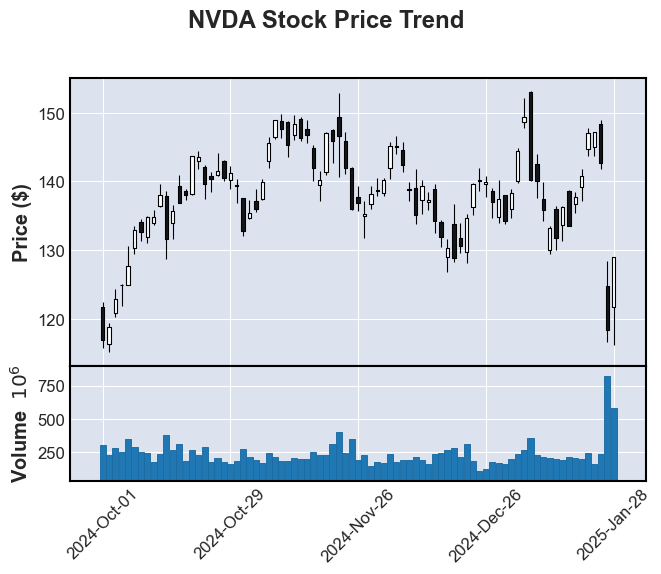

In [19]:
# Plot candlestick chart on a year level
mpf.plot(nvda_df_final, type='candle', volume=True, title="NVDA Stock Price Trend", ylabel="Price ($)")
mpf.show()

# **📌 Key Takeaways: NVDA Stock Price Trend for Q4**

### 1️. **Stable Price with Notable Spikes**
- The **NVDA stock price** had a gradual increase in October with an average closing price of approximately $117 per stock on 10/1/2024 to an average closing price of approximately $132 per stock on 10/31/2024 (first month of the 4th quarter) and then fluctuated between an average closing price of approximately $132 per stock and $148 per stock in November. In December, the price fluctuated between an average closing price of approximately $128 per stock and $145 per stock.   
- During November and December, the stock experienced **notable price spikes**, suggesting increased volatility.

### 2️. **Volume Surges Indicate Trading Interest**
- The average trade volume remained steady as the price of the stock increased in October of 2024. The average trade volume per day in November also remained steady as the price of the stock fluctuated noting an average trade volume of 400M on 11/21/2024 but the price of the stock increased to an average closing price of approximately $146 which is an increase of approximately $1 from the previous day. The average trade volume remained steady as the price of the stock fluctuated in December of 2024. 

### 3️. **Volatility Patterns & Market Correlations**
- The stock showed **mostly steady movement** in October with a sideways trend in November and December. The late-year spikes indicate potential changes in investor sentiment.  
- Further analysis is needed to determine **volatility patterns** and possible **correlations** with market trends.

---


In [20]:
# Generate separate candlestick plots for each quarter of NVDA
# Define custom market colors and chart style
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [21]:
# Convert Date index to datetime format (if not already converted)
nvda_df_final.index = pd.to_datetime(nvda_df_final.index)

In [22]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Plots the candlestick chart for a given quarter.

    Parameters:
    - title: Title of the plot (e.g., "Q1 2024")
    - year: Year to filter data
    - months: List of months in the quarter
    - extra_year: Additional year if needed (e.g., extending Q4 into January)
    - extra_months: Extra months from the additional year
    """

    # Filter the data for the given year and months
    quarter_data = nvda_df_final[(nvda_df_final.index.year == year) & (nvda_df_final.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending to January of next year)
    if extra_year and extra_months:
        extra_data = nvda_df_final[(nvda_df_final.index.year == extra_year) & (nvda_df_final.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()  # Merge and sort

    # If there is no data for the selected period, print a message and return
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Plot candlestick chart for the selected quarter
    fig, ax = mpf.plot(quarter_data, type='candle', volume=True,
                       title=f"NVDA Stock Price Trend ({title})",
                       ylabel="Price ($)",
                       xlabel="Date",
                       style=s,
                       mav=(10, 20, 50),  # Moving Averages (10-day, 20-day, 50-day)
                       figsize=(10, 6),
                       tight_layout=True,
                       returnfig=True)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

No data for Q1 (Jan-Mar 2024)
No data for Q2 (Apr-Jun 2024)
No data for Q3 (Jul-Sep 2024)


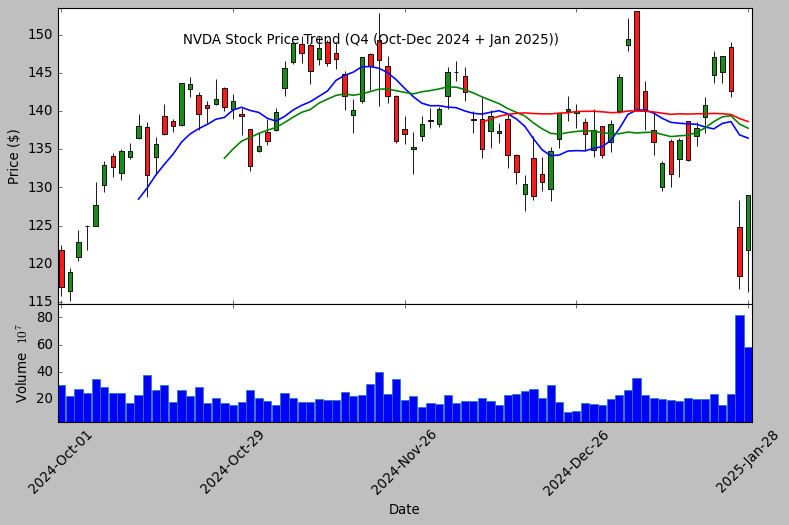

<Figure size 640x480 with 0 Axes>

In [26]:
# Generate candlestick charts for each quarter of 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3])    # First quarter
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])    # Second quarter
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])    # Third quarter
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])

plt.savefig('../images/nvda.png')  
# Fourth quarter extends to January 2025

# **📊 Key Takeaways from NVDA's January Stock Price Trends**

### **Jan 2025**
Throughout the month of January 2025, the stock price appeared to have a sideways trend similar to the movement of November and December raging between approximately $130 and $160 closing prices. However, the average closing price dropped to approximately $118 with a high and low of approximately $128 and $116 respectively by January 27, 2025. As of the end of January, the stock has remained at a high and low of approximately $127 and $119. 

In recent news, it is noted that a Chinese AI startup, Enter DeepSeek, has announced their new and highly cost efficient AI model. In light of this recent news, it appears that NVDA's stock price may have been impacted due to new market sentiment following the announcement. Nvidia, one of the dominant players in AI development and the second largest company in AI technology saw their stock price decrease as a result of this news announcement. The movement in this stock price can be seen in the above candle stick graph showing a signigicant amount of trade volume indicating large amounts of shares being sold. 


### **Overall Insights**
- Market events or speculative trading likely influenced the stock’s movements.
- Further analysis is needed to determine correlations with external market indices and industry trends.

---



# **📈 WOK Stock Price Trend Analysis**

This visualization tracks the stock price movements of WOK. Using a **candlestick chart**, we analyze the price fluctuations and trading volume patterns to identify key trends. The inclusion of volume data highlights potential investor interest and liquidity shifts over time.

Key objectives of this analysis:
- Identify major **price trends** and **volatility** patterns.
- Observe **trading volume spikes** that may indicate significant market activity.
- Assess how the stock has performed relative to different market conditions.

---

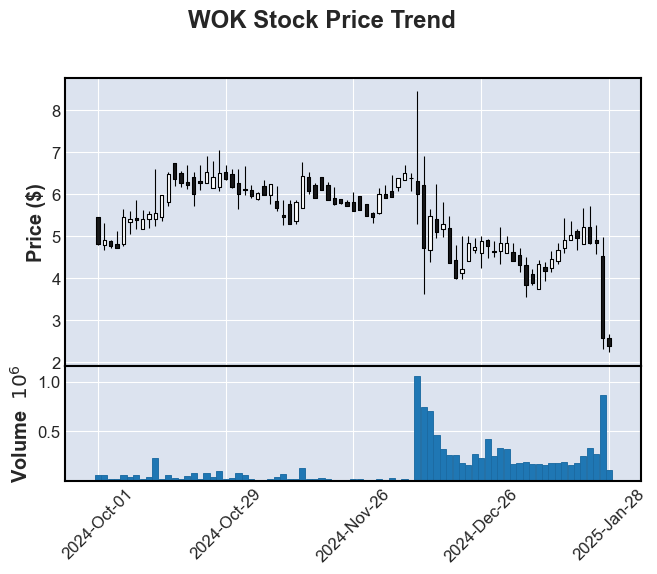

In [486]:
# Plot candlestick chart since IPO (2024-08-22)
mpf.plot(wok_df_final, type='candle', volume=True, title="WOK Stock Price Trend", ylabel="Price ($)")
mpf.show()

# **📌 Key Takeaways: WOK Stock Price Trend**                           

The **WOK stock price for Q4** 
---
shows an uptrend in October with an average closing price of approximately $4.80 per stock on 10/1/2024 to an average closing price of approximately $6 per stock on 10/31/2024 and then fluctuated between an average closing price of approximately $5.29 per stock and $6.42 per stock in November showing a sideways trend. Note that the volume of trade remained steady showing minimal trade activity during October and November. By December the average closing price was approximately $5.47 per stock and by 12/11/2024, it can be noted that the volume increased to approximately 1M shares traded and the price movement shows a price spike high for the day of approximately $8.80 per stock. The price of the stock spiked downward to a low of approximately $3.64 onthe following day. The volume traded continues to fluctuate as well following the same movement as the downward trend observed in December after 12/11/2024. 

In [487]:
# Generate separate candlestick plots for each quarter of WOK
# Define market colors and style for visualization
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [488]:
# Convert Date index to datetime format 
wok_df_final.index = pd.to_datetime(wok_df_final.index)

In [489]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Filters and plots WOK stock data for a given quarter.

    Parameters:
    - title: Title of the plot
    - year: Year to filter data
    - months: List of months to include
    - extra_year: Additional year to include for extended periods (optional)
    - extra_months: Additional months from extra_year (optional)
    """
    
    # Filter data for the specified quarter and year
    quarter_data = wok_df_final[(wok_df_final.index.year == year) & (wok_df_final.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending into January of the next year)
    if extra_year and extra_months:
        extra_data = wok_df_final[(wok_df_final.index.year == extra_year) & (wok_df_final.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()

    # If no data is found for the given period, print a message and exit function
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Generate candlestick plot with volume
    fig, ax = mpf.plot(
        quarter_data, type='candle', volume=True,
        title=f"WOK Stock Price Trend ({title})",
        ylabel="Price ($)",
        xlabel="Date",
        style=s,
        mav=(10, 20, 50),  # Moving Averages: 10-day, 20-day, 50-day
        figsize=(10,6),
        tight_layout=True,
        returnfig=True  # Returns figure and axis for further customization
    )

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

No data for Q1 (Jan-Mar 2024)
No data for Q2 (Apr-Jun 2024)
No data for Q3 (Jul-Sep 2024)


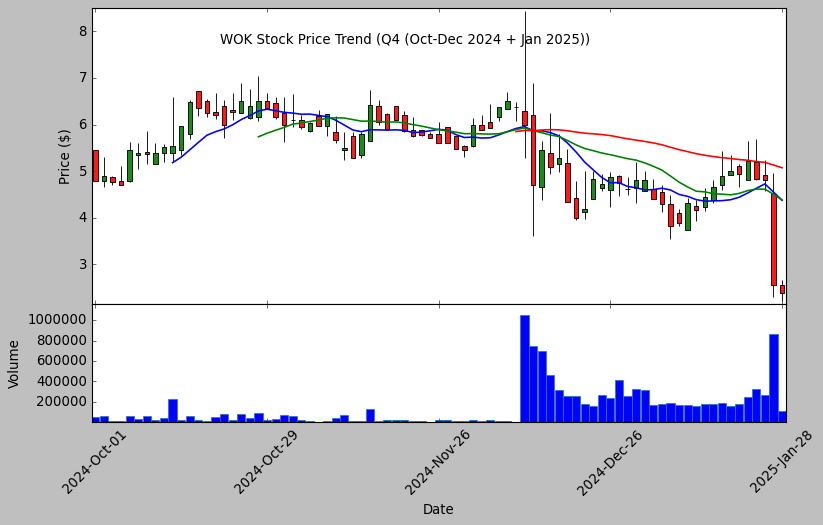

In [490]:
# Generate separate plots for each quarter in 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3]) 
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  # Jan 2025 only appears in Q4

# **📊 Key Takeaways: WOK Stock Price Trend**

### 3. **January 2025**
- In January of 2025 it is noted that there was another increase in volume traded on 1/27/2025 as well as a sharp decrease in price from an opening price of $4.57 to low of approximately $2.70. The trade volume for that day was approximatly 862M shares indicating large amounts of shares being sold.


---

# **🔺 Volatility & Risk Analysis**

Understanding the risk and volatility of NVDA and WOK is important for evaluating investment potential:

### 1️. Standard Deviation of Returns (Volatility)
- The **standard deviation of daily returns** is calculated to compare the volatility of NVDA and WOK.
- A **bar chart** visualizes which stock exhibits higher volatility from October 2024 onward.
- This helps assess the relative risk profile of both stocks.

### 2️. Rolling Volatility from October 2024
- A **rolling standard deviation** is computed to track volatility trends over time.
- The **line plot** compares fluctuations in risk for both stocks.
- This helps identify **periods of high volatility** and potential market-moving events.

In [491]:
# Filter data to start from October 2024 and create copies
start_date = "2024-10-01"
nvda_filtered = nvda_df_final.loc[start_date:].copy()
wok_filtered = wok_df_final.loc[start_date:].copy()

In [492]:
# Compute daily returns
nvda_filtered['Daily Return'] = nvda_filtered['close'].pct_change()
wok_filtered['Daily Return'] = wok_filtered['close'].pct_change()

In [493]:
# Calculate standard deviation of returns (volatility)
nvda_volatility = nvda_filtered['Daily Return'].std()
wok_volatility = wok_filtered['Daily Return'].std()

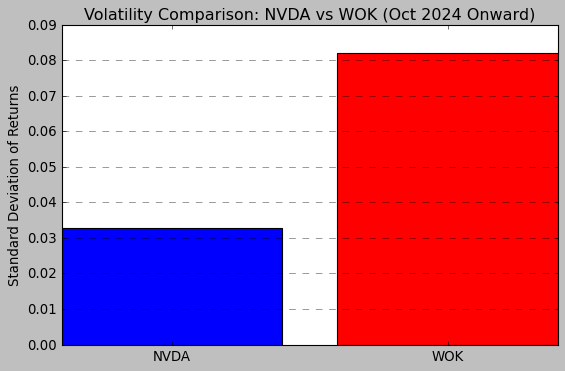

In [494]:
# Plot adjusted volatility comparison
plt.figure(figsize=(8, 5))
plt.bar(['NVDA', 'WOK'], [nvda_volatility, wok_volatility], color=['blue', 'red'])
plt.ylabel('Standard Deviation of Returns')
plt.title('Volatility Comparison: NVDA vs WOK (Oct 2024 Onward)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Key Takeaways: Volatility Comparison (NVDA vs WOK)**

### 🔹 Observations:
- **WOK exhibits higher volatility** compared to NVDA, as indicated by its higher standard deviation of returns.
- This suggests that **WOK’s price movements are more erratic**, making it a riskier but potentially more rewarding stock for traders.
- **NVDA demonstrates lower volatility**, implying more stable price movements with fewer extreme fluctuations.

### 🔎 Interpretation:
- **Higher volatility** in WOK could be due to speculative trading, market events, or liquidity issues.
- **Lower volatility** in NVDA suggests that it may be viewed as a more stable investment with consistent trading patterns.
- Investors and traders should consider **risk tolerance** and **investment strategy** when engaging with these stocks.

---

In [495]:
# Set the start date for filtering
start_date = "2024-10-01"

# Filter data and create copies
nvda_filtered = nvda_df_final.loc[start_date:].copy()
wok_filtered = wok_df_final.loc[start_date:].copy()

In [496]:
# Compute daily returns
nvda_filtered['Daily Return'] = nvda_filtered['close'].pct_change()
wok_filtered['Daily Return'] = wok_filtered['close'].pct_change()

In [497]:
# Compute rolling standard deviation (volatility)
nvda_filtered['Rolling Volatility'] = nvda_filtered['Daily Return'].rolling(window=30).std()
wok_filtered['Rolling Volatility'] = wok_filtered['Daily Return'].rolling(window=30).std()

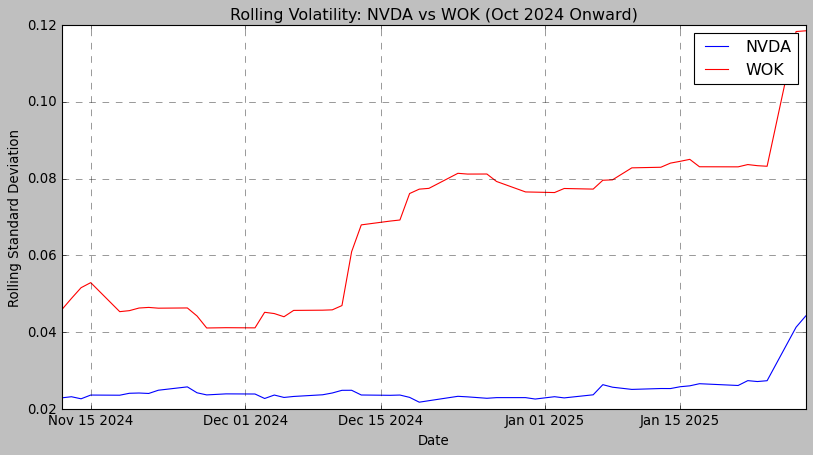

In [498]:
# Plot rolling volatility for both stocks
plt.figure(figsize=(12, 6))
plt.plot(nvda_filtered.index, nvda_filtered['Rolling Volatility'], label='NVDA', color='blue')
plt.plot(wok_filtered.index, wok_filtered['Rolling Volatility'], label='WOK', color='red')

# Formatting the plot
plt.title('Rolling Volatility: NVDA vs WOK (Oct 2024 Onward)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# **Key Takeaways: Rolling Voltality (NVDA vs WOK)**
- **WOK exhibited higher volatility fluctuations** compared to NVDA, particularly around mid-December.
- **NVDA maintained lower and more stable volatility** throughout the period, except for a noticeable increase in January.
- **Both stocks showed a spike in volatility towards mid-January 2025**, which may indicate significant market events, earnings reports, or macroeconomic influences.
- The increased volatility suggests **potential trading opportunities** but also **higher risk exposure** for investors.
- Further analysis is required to determine **external factors** driving these volatility shifts, such as **market sentiment, volume trends, or broader economic conditions**.

---

## **🚀 Analyzing NVDA & WOK Against a Market Index**
To gain a deeper understanding of the performance and volatility of **NVDA** and **WOK**, we are incorporating a **market index** for comparison. By analyzing these stocks against the **S&P 500 ETF (SPY)**, we can assess how they move in relation to the broader market and identify potential correlations.

### Approach:
1. **Fetching Market Index Data:**
   - We are using the **Alpha Vantage API** to retrieve historical daily adjusted closing prices for SPY.
   - The API request pulls a complete dataset, which is then **stored as a JSON file** for further analysis.

2. **Comparative Analysis:**
   - The market index data will be used to evaluate how **NVDA and WOK perform relative to broader market trends**.
   - We will investigate **volatility patterns, correlations, and potential deviations** from the overall market behavior.
   - The findings will help determine whether these stocks tend to **move with or against the market**, which is crucial for risk assessment and investment strategy.

By integrating SPY as a benchmark, we aim to **contextualize the movements of NVDA and WOK** within a larger economic framework.

In [499]:
# Install Alpha Vantage
# if needed - 
%pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [500]:
# Import necessary libraries for fetching and processing market data
from alpha_vantage.timeseries import TimeSeries
import requests
import json
import pandas as pd

In [501]:
# Import the API key securel
# Sorry, I initially meant vantage..
from cindy_private import alpha_advantage_api

In [502]:
# Define the market index symbol (S&P 500 ETF - SPY)
symbol = "SPY"

In [503]:
# Construct the API request URL to fetch daily adjusted closing prices
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api'

In [504]:
# Send a GET request to the Alpha Vantage API to fetch market data
r = requests.get(url)

In [505]:
# Parse the JSON response from the API
data = r.json()

In [506]:
# Print a confirmation message along with the requested URL
print(f"Fetching data from URL: {url}")

Fetching data from URL: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api


In [507]:
# Print the raw API response (JSON format) for verification
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SPY', '3. Last Refreshed': '2025-01-31', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-01-31': {'1. open': '607.5000', '2. high': '609.9600', '3. low': '601.0500', '4. close': '601.8200', '5. volume': '65444211'}, '2025-01-30': {'1. open': '603.9600', '2. high': '606.6000', '3. low': '600.7150', '4. close': '605.0400', '5. volume': '39281255'}, '2025-01-29': {'1. open': '603.7200', '2. high': '604.1300', '3. low': '599.2200', '4. close': '601.8100', '5. volume': '37177429'}, '2025-01-28': {'1. open': '600.6200', '2. high': '605.3700', '3. low': '597.2500', '4. close': '604.5200', '5. volume': '44433322'}, '2025-01-27': {'1. open': '594.8100', '2. high': '599.6900', '3. low': '594.6400', '4. close': '599.3700', '5. volume': '70361125'}, '2025-01-24': {'1. open': '609.8100', '2. high': '610.7800', '3. low': '606.8000', '4. close': '607.9700', '

In [508]:
# Save the retrieved market index data to a JSON file for further analysis
with open('market_index_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

# Confirm that the market data has been successfully saved
print("Market index data saved to market_index_data.json")

Market index data saved to market_index_data.json


## **Processing Market Index Data for Comparative Analysis**

### Objective:
To compare **NVDA** and **WOK** against the **market index (S&P 500 ETF - SPY)**, the market index data retrieved from **Alpha Vantage** must be cleaned and formatted.

### Approach:
- **Load and Convert Data:**  
  Read the JSON file containing historical market index data and convert it into a **Pandas DataFrame** for further manipulation.

- **Data Cleaning & Formatting:**  
  Rename columns for clarity, convert the **date index into a proper datetime format**, and reset the index so that **dates become a separate column**.

- **Filtering for Relevant Dates:**  
  The data is filtered starting from **October 1, 2024**, to match the period analyzed for the individual stocks.

With this structured approach, the market index data will be **ready for comparative analysis** with NVDA and WOK.

In [509]:
# Define the file path for the market index JSON data
file_path = '../Cindy\'s_work/market_index_data.json'

In [510]:
# Open and load the JSON data into a Python dictionary
with open(file_path, 'r') as json_file:
    market_data = json.load(json_file)

In [511]:
# Extract the "Time Series (Daily)" data and convert it into a Pandas DataFrame
market_index_df = pd.DataFrame.from_dict(market_data['Time Series (Daily)'], orient='index')

In [512]:
# Rename the column for closing price to "Market Close" and convert it to float
market_index_df = market_index_df.rename(columns={"4. close": "Market Close"}).astype(float)

In [513]:
# Rename all columns for better readability
market_index_df.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Market Close",
    "5. volume": "Volume"
}, inplace=True)

In [514]:
# Convert the index (which contains dates as strings) into proper datetime format
market_index_df.index = pd.to_datetime(market_index_df.index)

In [515]:
# Reset the index so that dates become a separate column
market_index_df = market_index_df.reset_index()

# Rename the new date column for clarity
market_index_df.rename(columns={'index': 'Date'}, inplace=True)

# Display the DataFrame to check the result# Display the first few rows to verify the cleaned dataset

In [516]:
# Filter the dataset to include only records from October 1, 2024, onward
filtered_market_index_df = market_index_df[market_index_df['Date'] >= '2024-10-01']

In [517]:
# Display the filtered DataFrame
print(filtered_market_index_df)

         Date    Open      High      Low  Market Close      Volume
0  2025-01-31  607.50  609.9600  601.050        601.82  65444211.0
1  2025-01-30  603.96  606.6000  600.715        605.04  39281255.0
2  2025-01-29  603.72  604.1300  599.220        601.81  37177429.0
3  2025-01-28  600.62  605.3700  597.250        604.52  44433322.0
4  2025-01-27  594.81  599.6900  594.640        599.37  70361125.0
..        ...     ...       ...      ...           ...         ...
79 2024-10-07  571.30  571.9599  566.630        567.80  49964690.0
80 2024-10-04  572.35  573.3600  568.100        572.98  43005186.0
81 2024-10-03  567.36  569.8025  565.490        567.82  40846466.0
82 2024-10-02  567.71  569.9000  565.270        568.86  38097798.0
83 2024-10-01  573.40  574.0622  566.000        568.62  72668778.0

[84 rows x 6 columns]


## **Finalizing Market Index Data for Analysis**

With the market index data successfully processed, the dataset now contains:  
✔ **Clean and structured data** with clear column names.  
✔ **Dates properly formatted** to align with NVDA and WOK stock data.  
✔ **Filtered data starting from October 2024**, ensuring consistency in analysis.

This dataset will now be used to **compare stock performance, volatility, and correlation** against broader market trends.

In [518]:
#if needed 
%pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [520]:
# Fetch NVDA data
nvda = yf.download("NVDA", start="2024-08-23")

# Fetch WOK data
wok = yf.download("WOK", start="2024-08-23")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [521]:
# Calculate daily returns
nvda['Daily Return'] = nvda['Close'].pct_change()
wok['Daily Return'] = wok['Close'].pct_change()

In [522]:
print(nvda[['Close', 'Daily Return']].head())
print(wok[['Close', 'Daily Return']].head())

Price            Close Daily Return
Ticker            NVDA             
Date                               
2024-08-23  129.350021          NaN
2024-08-26  126.440468    -0.022494
2024-08-27  128.280197     0.014550
2024-08-28  125.590607    -0.020967
2024-08-29  117.571838    -0.063848
Price      Close Daily Return
Ticker       WOK             
Date                         
2024-08-23  3.60          NaN
2024-08-26  3.70     0.027778
2024-08-27  3.53    -0.045946
2024-08-28  3.75     0.062323
2024-08-29  3.93     0.048000


# **MARKET INDEX FILTERED DF CLEANING**

In [523]:
# Filter data between October 1, 2024, and January 29, 2025
filtered_market_index_df = market_index_df[
    (market_index_df['Date'] >= '2024-10-01') & 
    (market_index_df['Date'] <= '2025-01-29')
].copy()

In [524]:
# Convert 'Market Close' column to numeric format for calculations
filtered_market_index_df['Market Close'] = pd.to_numeric(
    filtered_market_index_df['Market Close'], errors='coerce'
)

In [525]:
# Calculate Market Return as the percentage change in 'Market Close'
filtered_market_index_df['Market Return'] = filtered_market_index_df['Market Close'].pct_change()

In [526]:
# Sort the DataFrame by Date in ascending order
filtered_market_index_df = filtered_market_index_df.sort_values(by='Date', ascending=True)

In [527]:
# Reset index to ensure proper alignment and display
filtered_market_index_df = filtered_market_index_df.reset_index(drop=True)

In [528]:
# Reorder columns so 'Date' is the first column
column_order = ['Date', 'Open', 'High', 'Low', 'Market Close', 'Volume', 'Market Return']
filtered_market_index_df = filtered_market_index_df[column_order]

In [529]:
# Assign a new numerical index for readability
filtered_market_index_df.index = range(1, len(filtered_market_index_df) + 1)

In [530]:
# Convert index to datetime format
filtered_market_index_df.index = pd.to_datetime(filtered_market_index_df.index)

In [531]:
filtered_market_index_df

,Date,Open,High,Low,Market Close,Volume,Market Return
1970-01-01 00:00:00.000000001,2024-10-01,573.40,574.0622,566.00,568.62,72668778.0,-0.000422
1970-01-01 00:00:00.000000002,2024-10-02,567.71,569.9000,565.27,568.86,38097798.0,0.001832
1970-01-01 00:00:00.000000003,2024-10-03,567.36,569.8025,565.49,567.82,40846466.0,-0.009006
1970-01-01 00:00:00.000000004,2024-10-04,572.35,573.3600,568.10,572.98,43005186.0,0.009123
1970-01-01 00:00:00.000000005,2024-10-07,571.30,571.9599,566.63,567.80,49964690.0,-0.009369
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000078,2025-01-23,605.80,609.7500,605.52,609.75,41152102.0,0.002928
1970-01-01 00:00:00.000000079,2025-01-24,609.81,610.7800,606.80,607.97,34604693.0,0.014348
1970-01-01 00:00:00.000000080,2025-01-27,594.81,599.6900,594.64,599.37,70361125.0,-0.008519
1970-01-01 00:00:00.000000081,2025-01-28,600.62,605.3700,597.25,604.52,44433322.0,0.004503


- Tracking the historical performance of a market index provides valuable insight into broader trends. A dataset filtered from October 2024, to January 28, 2025, captures key trading metrics during this period. Price movements, trading volume, and market returns reveal patterns that help measure stability and risk.

- Comparing this dataset with individual stock performance requires structural consistency. Ensuring proper formatting allows for accurate statistical analysis. Market returns reflect fluctuations that influence investment decisions, and matching this with stock data enables a deeper understanding of risk exposure.

- Evaluating volatility remains a priority. Identifying shifts in market conditions helps refine stock comparisons. Establishing a reliable framework for analysis ensures that data-driven conclusions are well-supported. Adjustments to the dataset will maintain clarity and accuracy, reinforcing its role in financial evaluation.

# **NVDA DF CLEANING**

In [532]:
# Flatten the multi-index column names if necessary
nvda.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in nvda.columns]

In [533]:
# Drop unnecessary index columns if they exist 
columns_to_drop = ['level_0', 'index'] 
nvda = nvda.drop(columns=[col for col in columns_to_drop if col in nvda.columns])

In [534]:
# Reset index to move Date into a regular column 
nvda.reset_index(inplace=True)

In [535]:
# Convert index to datetime format
nvda.index = pd.to_datetime(nvda.index)

In [536]:
# Filter to only keep rows where Date is within the desired range
nvda = nvda[nvda['Date'] <= '2025-01-29']

In [537]:
nvda

,Date,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA,Daily Return_
1970-01-01 00:00:00.000000000,2024-08-23,129.350021,129.579997,125.200668,125.840569,323230300,NaN
1970-01-01 00:00:00.000000001,2024-08-26,126.440468,131.239722,124.350794,129.549996,331964700,-0.022494
1970-01-01 00:00:00.000000002,2024-08-27,128.280197,129.180052,123.860874,125.030699,303134600,0.014550
1970-01-01 00:00:00.000000003,2024-08-28,125.590607,128.310188,122.621064,128.100214,448101100,-0.020967
1970-01-01 00:00:00.000000004,2024-08-29,117.571838,124.410786,116.691977,121.341260,453023300,-0.063848
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000103,2025-01-23,147.220001,147.229996,143.720001,145.050003,155915500,0.001020
1970-01-01 00:00:00.000000104,2025-01-24,142.619995,148.970001,141.880005,148.369995,234657600,-0.031246
1970-01-01 00:00:00.000000105,2025-01-27,118.419998,128.399994,116.699997,124.800003,818830900,-0.169682
1970-01-01 00:00:00.000000106,2025-01-28,128.990005,129.000000,116.250000,121.809998,579666400,0.089259


In [538]:
print(nvda.columns)

Index(['Date', 'Close_NVDA', 'High_NVDA', 'Low_NVDA', 'Open_NVDA',
       'Volume_NVDA', 'Daily Return_'],
      dtype='object')


In [539]:
print(nvda.index.dtype)  
print(filtered_market_index_df.index.dtype)

datetime64[ns]
datetime64[ns]


- A structured dataset serves as the foundation for analyzing NVDA’s performance within a defined period. Ensuring data consistency requires adjusting column formats and filtering based on relevant time frames. Proper indexing, along with column restructuring, establishes the framework for meaningful comparisons.

- Formatting steps include eliminating redundant index columns, standardizing date formats, and confirming that the dataset aligns with broader market data. A direct comparison between NVDA and the market index necessitates these adjustments, allowing for accurate statistical evaluations such as return correlations and volatility assessments.

- Examining the filtered data provides insight into NVDA’s price trends, volume fluctuations, and return behavior. Ensuring alignment between the NVDA dataset and the market index supports a broader risk assessment framework, helping to contextualize stock behavior within overall market conditions.

---

# **📊 Understanding NVDA's Beta: Market Sensitivity Analysis**

Before diving into the visualization, the **Beta value** for NVDA is determined to assess how the stock moves in relation to the overall market. This is accomplished by calculating the **covariance between NVDA’s daily returns and market returns**, then dividing it by the **variance of market returns**. 

A regression analysis follows, where **NVDA’s daily returns** are plotted against **market returns** to visualize the relationship. The **slope of the regression line represents the Beta value**, quantifying NVDA’s risk exposure relative to the market.

In [540]:
# Merge NVDA with Market Index on Date
nvda_merged_data = pd.merge(nvda[['Date', 'Daily Return_']],
                       filtered_market_index_df[['Date', 'Market Return']], 
                       on='Date', how='inner')

In [541]:
# Rename columns for clarity
nvda_merged_data.rename(columns={'Daily Return_': 'NVDA Daily Return'}, inplace=True)

In [542]:
# Display first few rows
nvda_merged_data.head()

,Date,NVDA Daily Return,Market Return
0,2024-10-01,-0.036561,-0.000422
1,2024-10-02,0.015812,0.001832
2,2024-10-03,0.033656,-0.009006
3,2024-10-04,0.016850,0.009123
4,2024-10-07,0.022414,-0.009369


In [543]:
# Compute covariance matrix
cov_matrix = nvda_merged_data[['NVDA Daily Return', 'Market Return']].cov()

# Extract covariance of NVDA vs. Market
cov_nvda_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
nvda_beta = cov_nvda_market / var_market

In [544]:
# Print Beta value
print(f"NVDA Beta: {nvda_beta:.3f}")

NVDA Beta: -0.178


In [545]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

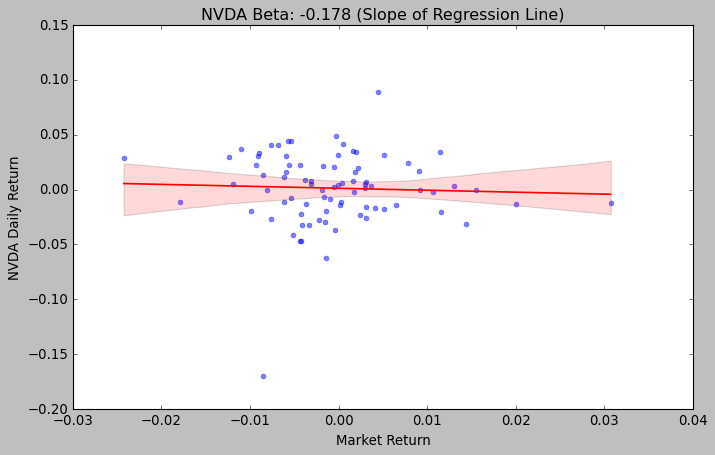

In [546]:
# Compute Beta
beta_value = nvda_merged_data[['NVDA Daily Return', 'Market Return']].cov().iloc[0, 1] / nvda_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=nvda_merged_data['Market Return'], 
            y=nvda_merged_data['NVDA Daily Return'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('NVDA Daily Return')
plt.title(f'NVDA Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

# 📉 Interpreting the Regression Plot

The scatter plot displays **NVDA’s daily returns (y-axis) against market returns (x-axis)**, with a **red regression line** fitted to illustrate the trend. The **slope of this line (-.178)** represents NVDA’s Beta, indicating that NVDA is **-17.8% less volatile than the market**. 

- A **gentle slope (<1)** suggests NVDA reacts less aggressively to market fluctuations.
- The **shaded region around the line** represents the **confidence interval**, offering insight into the variability of this relationship.
- **Data points clustered closer to the regression line** highlight consistency in NVDA’s reaction to market movements indicating stability

Traders and investors can use this insight to assess risk, with a high Beta stock like NVDA being a **potentially rewarding but riskier investment** in comparison to lower Beta alternatives.

# **WOK DF CLEANING**

In [547]:
# Flatten the multi-index column names if necessary 
wok.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in wok.columns]

In [548]:
# Drop unnecessary index columns if they exist 
columns_to_drop = ['level_0', 'index'] 
wok = wok.drop(columns=[col for col in columns_to_drop if col in wok.columns])

In [549]:
# Reset index to move Date into a regular column 
wok.reset_index(inplace=True)

In [550]:
# Convert index to datetime format
wok.index = pd.to_datetime(wok.index)

In [551]:
# Filter to only keep rows where Date is within the desired range
wok = wok[wok['Date'] <= '2025-01-29']

In [552]:
wok

,Date,Close_WOK,High_WOK,Low_WOK,Open_WOK,Volume_WOK,Daily Return_
1970-01-01 00:00:00.000000000,2024-08-23,3.60,4.20,3.500,3.60,1072700,NaN
1970-01-01 00:00:00.000000001,2024-08-26,3.70,3.99,3.550,3.61,383000,0.027778
1970-01-01 00:00:00.000000002,2024-08-27,3.53,3.70,3.260,3.60,230700,-0.045946
1970-01-01 00:00:00.000000003,2024-08-28,3.75,4.05,3.510,3.51,339700,0.062323
1970-01-01 00:00:00.000000004,2024-08-29,3.93,5.29,3.710,3.84,1244300,0.048000
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000103,2025-01-23,4.83,5.70,4.812,5.20,328100,-0.072937
1970-01-01 00:00:00.000000104,2025-01-24,4.82,5.25,4.570,4.91,264400,-0.002070
1970-01-01 00:00:00.000000105,2025-01-27,2.57,4.97,2.300,4.51,862700,-0.466805
1970-01-01 00:00:00.000000106,2025-01-28,2.38,2.67,2.220,2.57,112500,-0.073930


In [553]:
print(wok.columns)

Index(['Date', 'Close_WOK', 'High_WOK', 'Low_WOK', 'Open_WOK', 'Volume_WOK',
       'Daily Return_'],
      dtype='object')


In [554]:
print(wok.index.dtype)  

datetime64[ns]


- A structured dataset serves as the foundation for analyzing NVDA’s performance within a defined period. Ensuring data consistency requires adjusting column formats and filtering based on relevant time frames. Proper indexing, along with column restructuring, establishes the framework for meaningful comparisons.

- Formatting steps include eliminating redundant index columns, standardizing date formats, and confirming that the dataset aligns with broader market data. A direct comparison between NVDA and the market index necessitates these adjustments, allowing for accurate statistical evaluations such as return correlations and volatility assessments.

- Examining the filtered data provides insight into NVDA’s price trends, volume fluctuations, and return behavior. Ensuring alignment between the NVDA dataset and the market index supports a broader risk assessment framework, helping to contextualize stock behavior within overall market conditions.

---

# **📊 Understanding WOK's Beta: Market Sensitivity Analysis**

Before diving into the visualization, the **Beta value** for WOK is determined to assess how the stock moves in relation to the overall market. This is accomplished by calculating the **covariance between WOK’s daily returns and market returns**, then dividing it by the **variance of market returns**. 

A regression analysis follows, where **WOK’s daily returns** are plotted against **market returns** to visualize the relationship. The **slope of the regression line represents the Beta value**, quantifying NVDA’s risk exposure relative to the market.

In [555]:
# Merge WOK with Market Index on Date
wok_merged_data = pd.merge(wok[['Date', 'Daily Return_']],
                       filtered_market_index_df[['Date', 'Market Return']], 
                       on='Date', how='inner')

In [556]:
# Rename columns for clarity
wok_merged_data.rename(columns={'Daily Return_': 'WOK Daily Return'}, inplace=True)

In [557]:
# Display first few rows
wok_merged_data.head()

,Date,WOK Daily Return,Market Return
0,2024-10-01,-0.066148,-0.000422
1,2024-10-02,0.020833,0.001832
2,2024-10-03,-0.028571,-0.009006
3,2024-10-04,-0.010504,0.009123
4,2024-10-07,0.157112,-0.009369


In [558]:
# Compute covariance matrix
cov_matrix = wok_merged_data[['WOK Daily Return', 'Market Return']].cov()

# Extract covariance of WOK vs. Market
cov_WOK_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
wok_beta = cov_WOK_market / var_market

In [559]:
# Print Beta value
print(f"WOK Beta: {wok_beta:.3f}")

WOK Beta: -0.024


In [560]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

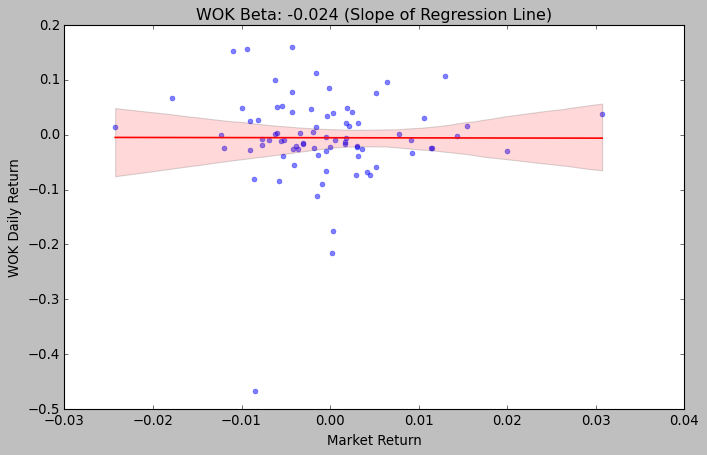

In [561]:
# Compute Beta
beta_value = wok_merged_data[['WOK Daily Return', 'Market Return']].cov().iloc[0, 1] / wok_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=wok_merged_data['Market Return'], 
            y=wok_merged_data['WOK Daily Return'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('WOK Daily Return')
plt.title(f'WOK Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

# 📉 Interpreting the Regression Plot

The scatter plot maps **WOK’s daily returns (y-axis) against market returns (x-axis)**, with a **red regression line** representing the trend. The slope of this line (-0.024) determines **WOK’s Beta**, indicating that WOK moves far less than the overall market.

- **A Beta of -0.024** suggests that WOK is significantly less volatile than the market. When the market moves, WOK experiences **only a fraction of the impact**.
- The **flat slope** of the regression line reflects **minimal correlation** between WOK and market fluctuations.
- The **shaded confidence interval** around the line highlights variability in this relationship, showing that WOK does not consistently follow market trends.

Investors looking for **stability** may find WOK appealing since its **low Beta** suggests **limited exposure to broader market volatility**. However, this also means **less opportunity for high returns during market upswings**.

---

After carefully analyzing the data for each stock, NVDA would be a better investment. Although both stocks show decline in late January 2025, the data appears to be in favor of NVDA.